## Title: <font color='Blue'> Influence of Lifestyle Factors on Sleep Disorders and Quality </font>

### <font color='Blue'> CA1 - Machine Learning </font> 
### Student: <font color='blue'>sbs24050</font> 
### Name:<font color='blue'>Denisse Garcia</font> 

### Dataset Source : https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset

file_path = 'Sleep_health_and_lifestyle_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head(10))




   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   
5          6   Male   28     Software Engineer             5.9   
6          7   Male   29               Teacher             6.3   
7          8   Male   29                Doctor             7.8   
8          9   Male   29                Doctor             7.8   
9         10   Male   29                Doctor             7.8   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60    

In [17]:

# Check for null values in each column
null_counts = data.isnull().sum()
print(null_counts)

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [22]:
# remove rows with any null value 

data_cleaned = data.dropna()
print(data_cleaned.isnull().sum())  # Check again to ensure no more null values

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [28]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Check data types
print(data[['Age', 'Sleep Duration', 'Quality of Sleep']].dtypes)

# Convert data types if necessary
data['Sleep Duration'] = pd.to_numeric(data['Sleep Duration'], errors='coerce')
data['Quality of Sleep'] = pd.to_numeric(data['Quality of Sleep'], errors='coerce')

# Check for and drop any null values in these columns
data.dropna(subset=['Age', 'Sleep Duration', 'Quality of Sleep'], inplace=True)

# Summary statistics to understand the distributions
print(data[['Age', 'Sleep Duration', 'Quality of Sleep']].describe())


Age                   int64
Sleep Duration      float64
Quality of Sleep      int64
dtype: object
              Age  Sleep Duration  Quality of Sleep
count  374.000000      374.000000        374.000000
mean    42.184492        7.132086          7.312834
std      8.673133        0.795657          1.196956
min     27.000000        5.800000          4.000000
25%     35.250000        6.400000          6.000000
50%     43.000000        7.200000          7.000000
75%     50.000000        7.800000          8.000000
max     59.000000        8.500000          9.000000


### Descriptive Statistics


Count: Each variable has 374 entries, indicating there are no missing values in these columns.

Mean (Average):
- Age: The average age of participants is approximately 42.18 years.
- Sleep Duration: On average, participants sleep about 7.13 hours per night.
- Quality of Sleep: The average sleep quality rating is about 7.31 on the scale used (the scale likely ranges from 1 to 10, with 10 being the best based on the max value).

- **Standard Deviation (std)**:
  - **Age**: The standard deviation is 8.67, suggesting a moderate spread around the average age.
  - **Sleep Duration**: The standard deviation of 0.80 hours indicates that most people's sleep duration varies somewhat around the mean, but not excessively.
  - **Quality of Sleep**: The standard deviation of 1.20 points out a mild variation in how people rate their sleep quality.

- **Minimum (min)** and **Maximum (max)**:
  - These values show the range of the data.
  - **Age** ranges from 27 to 59 years.
  - **Sleep Duration** ranges from 5.8 to 8.5 hours per night.
  - **Quality of Sleep** ranges from 4 to 9 on the rating scale.

- **Percentiles (25%, 50%, 75%)**:
  - **25% (First Quartile)**: At least 25% of the observations fall below these values:
    - Age: 35.25 years or younger.
    - Sleep Duration: 6.4 hours or less.
    - Quality of Sleep: 6 or lower.
  - **50% (Median)**: Half of the observations fall below these values (also the median):
    - Age: 43 years.
    - Sleep Duration: 7.2 hours.
    - Quality of Sleep: 7.
  - **75% (Third Quartile)**: At least 75% of observations fall below these values:
    - Age: 50 years or younger.
    - Sleep Duration: 7.8 hours or less.
    - Quality of Sleep: 8 or lower.

### Interpretation Summary
The data suggests that the typical participant is a middle-aged adult with a moderate variability in age distribution. Most participants sleep around 7 to 8 hours, which is in line with general sleep recommendations for adults. The quality of sleep, while generally rated as good, shows some variation, indicating that while many participants are satisfied with their sleep, there are a few who find their sleep quality lacking.

This summary and understanding can be foundational for further analyses, such as investigating how age correlates with sleep duration and quality, or identifying factors that contribute to better or worse sleep ratings among different age groups.

In [29]:
# Calculate correlation matrix
correlation_matrix = data[['Age', 'Sleep Duration', 'Quality of Sleep']].corr()
print(correlation_matrix)


                       Age  Sleep Duration  Quality of Sleep
Age               1.000000        0.344709          0.473734
Sleep Duration    0.344709        1.000000          0.883213
Quality of Sleep  0.473734        0.883213          1.000000


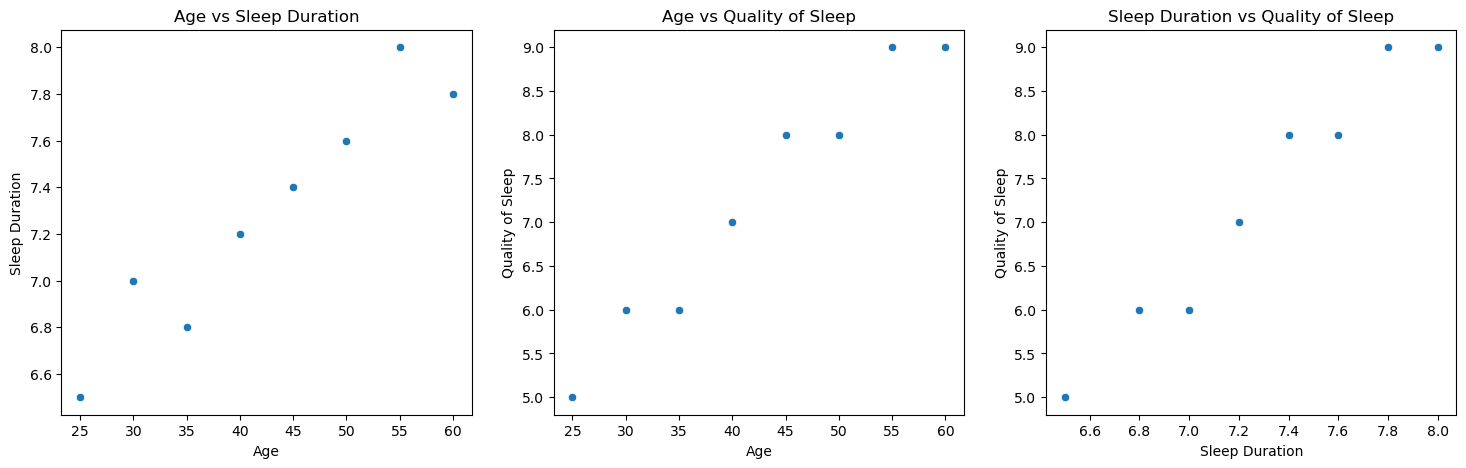

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame setup
data = pd.DataFrame({
    'Age': [25, 30, 35, 40, 45, 50, 55, 60],
    'Sleep Duration': [6.5, 7, 6.8, 7.2, 7.4, 7.6, 8, 7.8],
    'Quality of Sleep': [5, 6, 6, 7, 8, 8, 9, 9]
})

# Creating scatter plots
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='Age', y='Sleep Duration', data=data)
plt.title('Age vs Sleep Duration')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Age', y='Quality of Sleep', data=data)
plt.title('Age vs Quality of Sleep')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Sleep Duration', y='Quality of Sleep', data=data)
plt.title('Sleep Duration vs Quality of Sleep')

plt.show()



1. **Age and Sleep Duration (0.344709)**
   - This coefficient indicates a moderate positive correlation between age and sleep duration. As age increases, sleep duration also tends to increase, but the correlation is not very strong. This suggests other factors might also play significant roles in determining sleep duration.

2. **Age and Quality of Sleep (0.473734)**
   - This shows a moderate to strong positive correlation between age and quality of sleep. As people age, there appears to be a tendency for sleep quality to improve. This is a more noticeable trend than that between age and sleep duration.

3. **Sleep Duration and Quality of Sleep (0.883213)**
   - This is a very strong positive correlation, indicating that as sleep duration increases, quality of sleep generally increases as well. This suggests that the length of sleep is a significant predictor of its quality and that improvements in sleep duration are likely to be associated with improvements in sleep quality.




### Using This Information
- **Health Policy**: These insights can be used by health professionals to tailor sleep health advice based on age and target interventions to improve sleep duration and quality.
- **Further Research**: It might be useful to investigate why these correlations exist and whether factors like lifestyle, health conditions, or medication use could be influencing these relationships.

Understanding these correlations helps in formulating hypotheses for detailed studies and in designing interventions aimed at improving sleep health across different age groups.

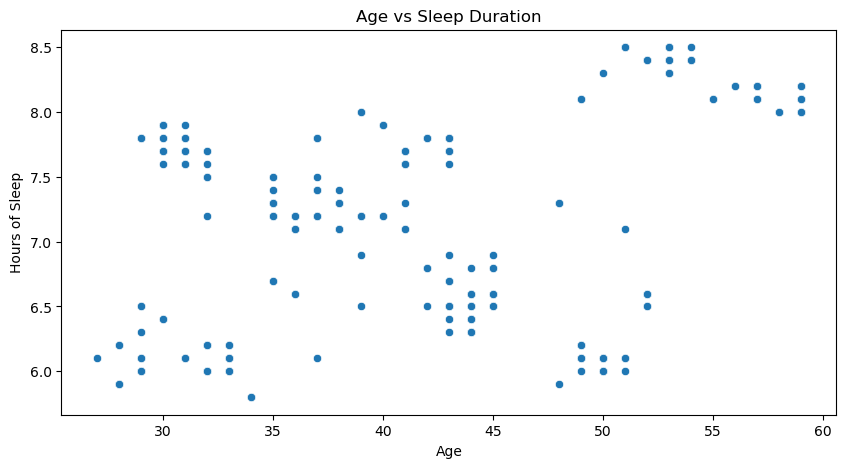

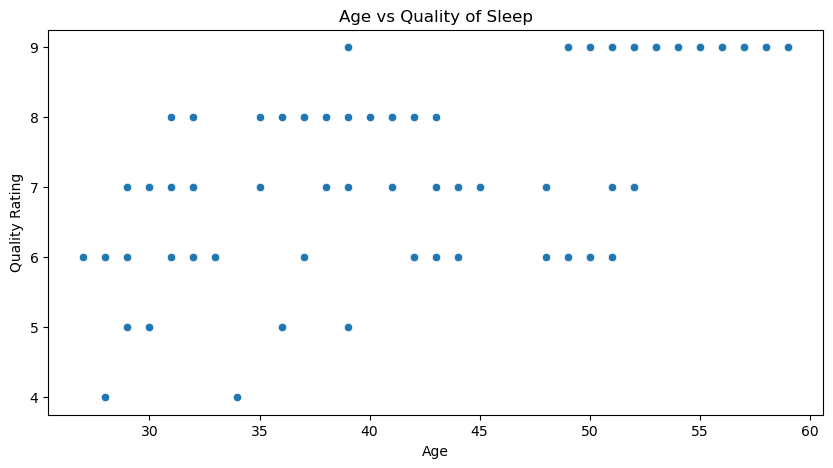

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Age vs. Sleep Duration
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Age', y='Sleep Duration', data=data)
plt.title('Age vs Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Hours of Sleep')
plt.show()

# Scatter plot for Age vs. Quality of Sleep
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Age', y='Quality of Sleep', data=data)
plt.title('Age vs Quality of Sleep')
plt.xlabel('Age')
plt.ylabel('Quality Rating')
plt.show()


In [23]:

# Check for missing values and handle them if necessary
# Assuming no missing values as previously mentioned
# data.fillna(method='ffill', inplace=True)

# Sample the data if more than 500 rows are needed, else just shuffle
data = data.sample(n=500, replace=True, random_state=1) if len(data) > 500 else data.sample(frac=1, random_state=1)

# Split data for cross-validation
train_20, test_20 = train_test_split(data, test_size=0.80, random_state=1)
train_25, test_25 = train_test_split(data, test_size=0.75, random_state=1)
train_30, test_30 = train_test_split(data, test_size=0.70, random_state=1)

In [26]:
# import the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [34]:
import pandas as pd

# Load your dataset
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Convert categorical data to numeric if needed
data['Gender'] = data['Gender'].astype('category').cat.codes  # Male = 0, Female = 1, for example
data['Occupation'] = data['Occupation'].astype('category').cat.codes


C:\Users\degarcia\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


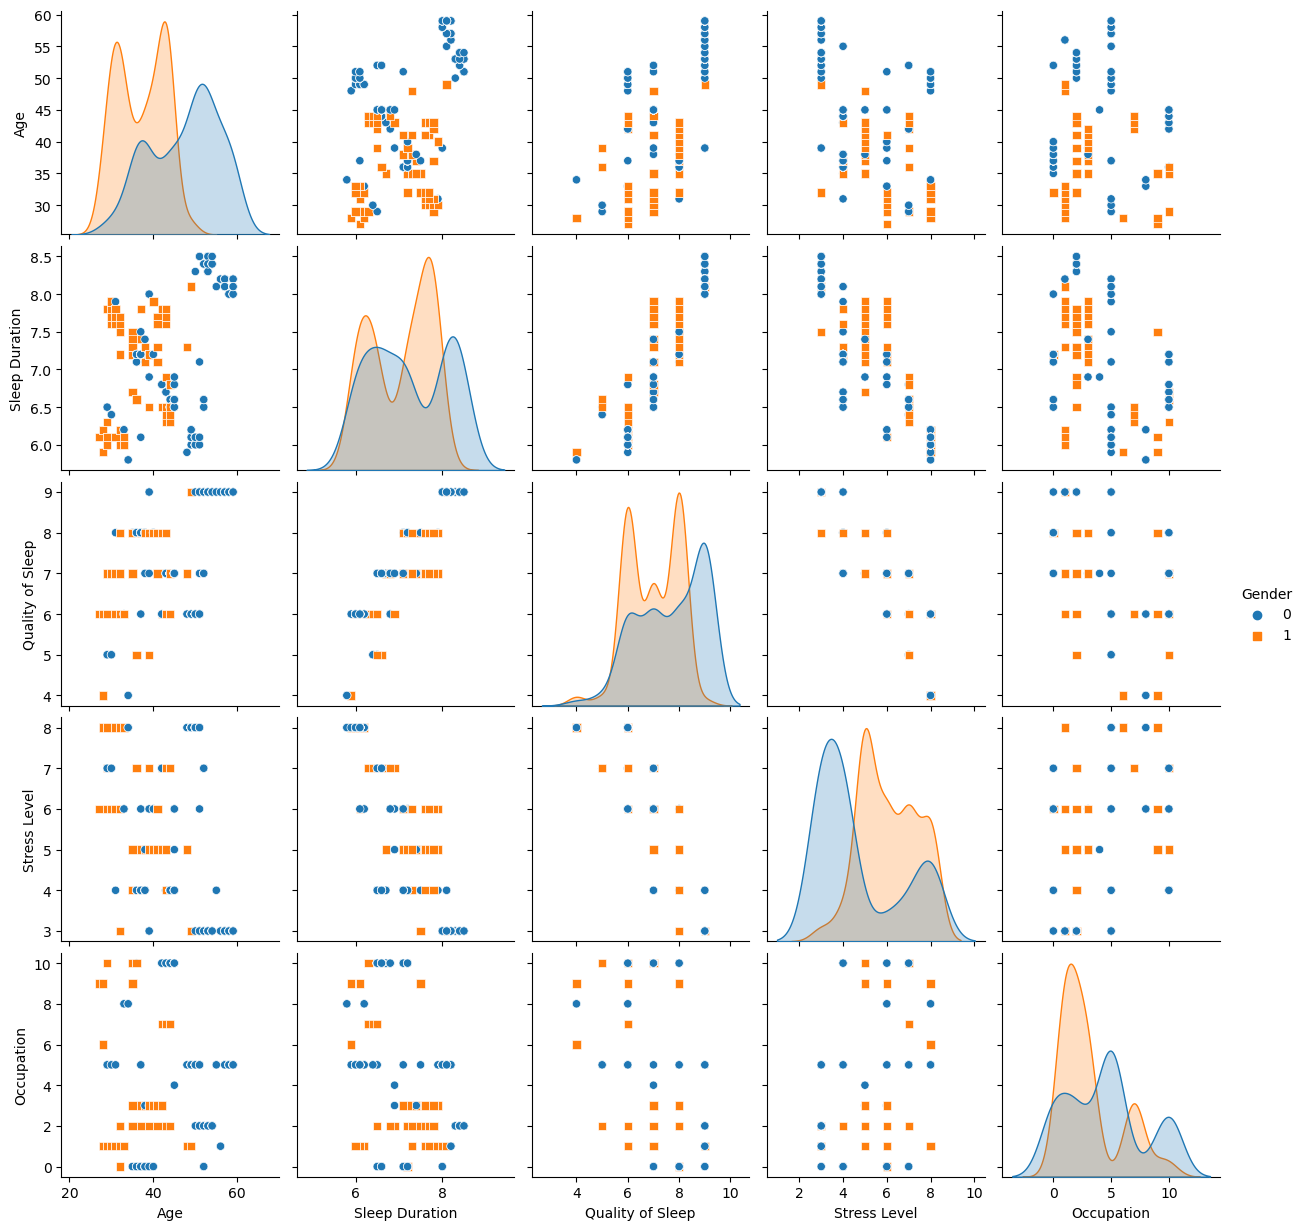

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data[['Age', 'Sleep Duration', 'Quality of Sleep', 'Stress Level', 'Occupation', 'Gender']], hue='Gender', markers=["o", "s"])
plt.show()

In [36]:
# Correlation matrix for numeric variables
print(data[['Age', 'Sleep Duration', 'Quality of Sleep', 'Stress Level']].corr())

# ANOVA for categorical variables impact on 'Quality of Sleep'
import statsmodels.api as sm
from statsmodels.formula.api import ols

# For Occupation's impact
model = ols('Quality of Sleep ~ C(Occupation)', data=data).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)

# For Gender's impact
model = ols('Quality of Sleep ~ C(Gender)', data=data).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)


                       Age  Sleep Duration  Quality of Sleep  Stress Level
Age               1.000000        0.344709          0.473734     -0.422344
Sleep Duration    0.344709        1.000000          0.883213     -0.811023
Quality of Sleep  0.473734        0.883213          1.000000     -0.898752
Stress Level     -0.422344       -0.811023         -0.898752      1.000000


SyntaxError: invalid syntax (<unknown>, line 1)

In [37]:
from sklearn.linear_model import LinearRegression

X = data[['Age', 'Stress Level', 'Occupation', 'Gender']]  # Include relevant predictors
y = data['Quality of Sleep']

model = LinearRegression()
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [ 0.03740471 -0.56097748 -0.11495955  0.32350497]
Intercept: 9.026042866167767


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the data
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Example of encoding categorical data
label_encoder = LabelEncoder()
data['Occupation'] = label_encoder.fit_transform(data['Occupation'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Selecting features and target
X = data[['Age', 'Sleep Duration', 'Stress Level', 'Occupation', 'Gender']]  # Feature columns
y = data['Quality of Sleep']  # Target variable

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training the kNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 0  1  1  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  1 25  0  0  0]
 [ 0  1  0 13  2  0]
 [ 0  0  0  0 18  0]
 [ 0  0  0  0  0 12]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         2
           5       0.25      1.00      0.40         1
           6       0.96      0.96      0.96        26
           7       1.00      0.81      0.90        16
           8       0.90      1.00      0.95        18
           9       1.00      1.00      1.00        12

    accuracy                           0.92        75
   macro avg       0.69      0.80      0.70        75
weighted avg       0.93      0.92      0.92        75



C:\Users\degarcia\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\degarcia\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\degarcia\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


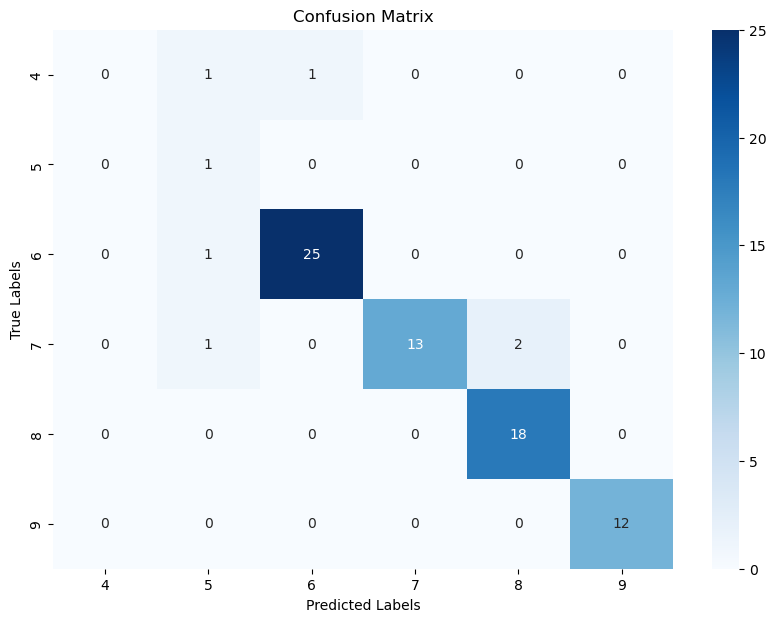

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Assuming 'y_test' is your actual labels and 'y_pred' are the predictions from the kNN classifier
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[4, 5, 6, 7, 8, 9], yticklabels=[4, 5, 6, 7, 8, 9])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


C:\Users\degarcia\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\degarcia\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\degarcia\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


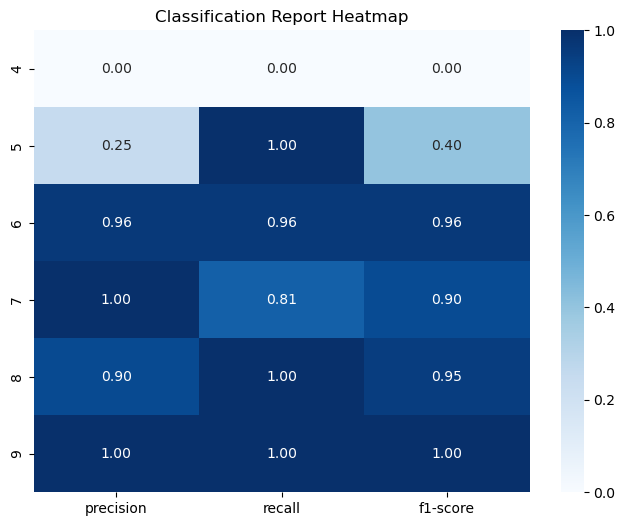

In [40]:
import pandas as pd
import seaborn as sns

# Generate a classification report
report = metrics.classification_report(y_test, y_pred, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Create a heatmap of the classification report
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-3, :-1], annot=True, cmap='Blues', fmt=".2f")  # skip the last 3 rows (support, macro avg, weighted avg)
plt.title('Classification Report Heatmap')
plt.show()


ValueError: Grouper and axis must be same length

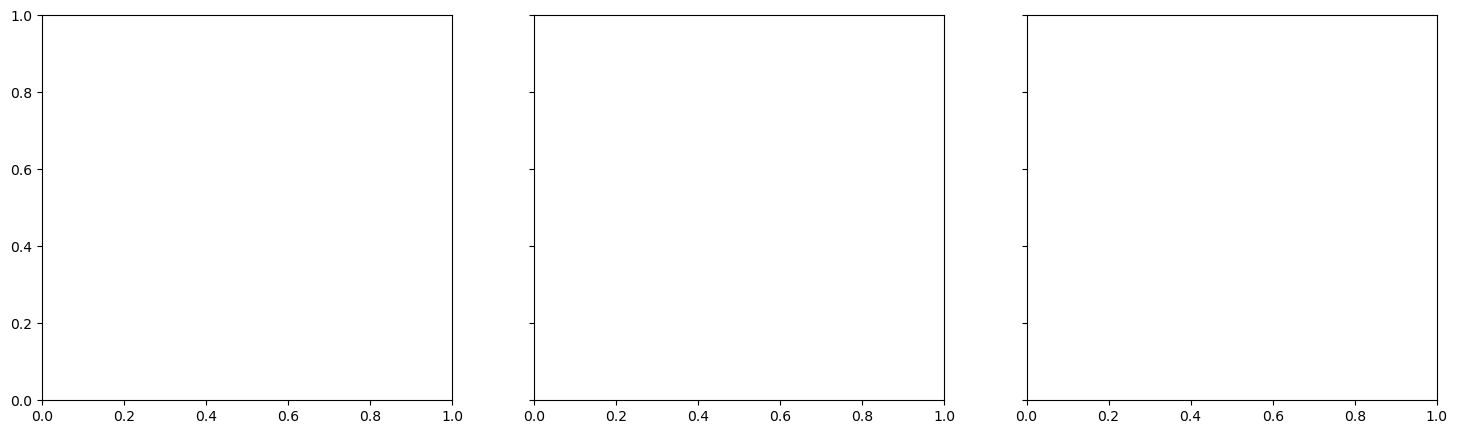

In [41]:
# Plotting each metric in a bar chart
report_df.drop(['accuracy'], inplace=True)  # Remove the 'accuracy' row if present
metrics = report_df.columns[:-1]  # Assuming the last column is 'support'

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharey=True)
for i, metric in enumerate(metrics):
    sns.barplot(x=report_df.index[:-3], y=report_df[metric], ax=axes[i])  # Exclude the last 3 rows as before
    axes[i].set_title(f'{metric.capitalize()} by Class')
    axes[i].set_xlabel('Class')
    axes[i].set_ylabel(metric.capitalize())
    axes[i].set_ylim(0, 1)

plt.tight_layout()
plt.show()


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [48]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming you have a DataFrame 'data' with columns including 'Occupation', 'Gender', etc.
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')  # Example path

# Setting up the ColumnTransformer for One-Hot Encoding
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), ['Occupation'])],  # Apply OneHotEncoder to 'Occupation'
    remainder='passthrough'  # Keep the rest of the columns unchanged
)

# Fit and transform the data
transformed_data = ct.fit_transform(data)

# Handling transformed data - get feature names from OneHotEncoder
# Fetch the transformer by name first
onehot_columns = ct.named_transformers_['one_hot_encoder'].get_feature_names_out()

# Construct DataFrame from the numpy array 'transformed_data'
# We need to recreate the list of all column names
# Assuming 'Occupation' is replaced, we remove it from the original list and add new names
new_columns = [name for name in data.columns if name not in ['Occupation']] + list(onehot_columns)

# Since the transformed columns are appended at the end after the 'remainder', we need to reorder the columns
new_columns_reordered = list(onehot_columns) + [name for name in data.columns if name not in ['Occupation']]

# Create the DataFrame
new_data = pd.DataFrame(transformed_data, columns=new_columns_reordered)

# Print the head of the new DataFrame to verify
print(new_data.head())


  Occupation_Accountant Occupation_Doctor Occupation_Engineer  \
0                   0.0               0.0                 0.0   
1                   0.0               1.0                 0.0   
2                   0.0               1.0                 0.0   
3                   0.0               0.0                 0.0   
4                   0.0               0.0                 0.0   

  Occupation_Lawyer Occupation_Manager Occupation_Nurse  \
0               0.0                0.0              0.0   
1               0.0                0.0              0.0   
2               0.0                0.0              0.0   
3               0.0                0.0              0.0   
4               0.0                0.0              0.0   

  Occupation_Sales Representative Occupation_Salesperson Occupation_Scientist  \
0                             0.0                    0.0                  0.0   
1                             0.0                    0.0                  0.0   
2          

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Make sure X does not contain non-numeric columns


ValueError: could not convert string to float: 'Male'

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
